### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했 (불가시 구매수량)는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [1]:
import pandas as pd

path = "./datasets/customer_order_data.csv"
cp_df = pd.read_csv(path)

display(cp_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [2]:
cp_df[cp_df['CustomerID'] == 5557]

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
63,5557,2023-04-14,511.86,Product D,522866,London
180,5557,2023-04-22,996.98,Product D,765620,Tokyo
861,5557,2023-06-01,870.61,Product B,832052,Tokyo


In [3]:
# 중복된 고객 식별자를 포함한 DataFrame 생성
duplicated_customers = cp_df[cp_df.duplicated(subset=['CustomerID'], keep=False)]

# 고객 식별자를 기준으로 그룹화하여 중복된 횟수 세기
duplicated_counts = duplicated_customers.groupby('CustomerID').size()

# 중복된 횟수가 2번인 경우
duplicated_twice = duplicated_counts[duplicated_counts == 2]

# 중복된 횟수가 3번인 경우
duplicated_thrice = duplicated_counts[duplicated_counts == 3]

print("중복된 횟수가 2번인 고객 수:", len(duplicated_twice))
print("중복된 횟수가 3번인 고객 수:", len(duplicated_thrice))

중복된 횟수가 2번인 고객 수: 48
중복된 횟수가 3번인 고객 수: 3


In [4]:
# 중복된 고객 식별자를 포함한 DataFrame 생성
duplicated_customers = cp_df[cp_df.duplicated(subset=['CustomerID'], keep=False)]

# 고객 식별자를 기준으로 그룹화하여 중복된 횟수 세기
duplicated_counts = duplicated_customers.groupby('CustomerID').size()

# 중복된 횟수가 2번인 경우
duplicated_twice = duplicated_counts[duplicated_counts == 2]

# 중복된 횟수가 3번인 경우
duplicated_thrice = duplicated_counts[duplicated_counts == 3]

print("중복된 횟수가 2번인 고객 수:", len(duplicated_twice))
print("중복된 횟수가 3번인 고객 수:", len(duplicated_thrice))

중복된 횟수가 2번인 고객 수: 48
중복된 횟수가 3번인 고객 수: 3


In [5]:
cp_df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

orderId > ordercount로 바꾸는 방향으로 가봅시다.
ProductInformation -> buy-a /b /c /d로
amount -> totalprice 근데 이거는 각각의 구매 가격으로 
PurchaseDate -> 월 단위로
중복된 친구들 제거해주기

In [6]:
# orderId > ordercount로 바꾸는 방향으로 가봅시다.
# CustomerID를 기준으로 중복 검사 후 넣기
cp_df['OrderID'] = cp_df.groupby('CustomerID').cumcount() + 1
cp_df.rename(columns={'OrderID': 'OrderCount'}, inplace=True)
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderCount,Location
0,8814,2023-04-11,943.31,Product C,1,Tokyo
1,2188,2023-04-11,463.70,Product A,1,London
2,4608,2023-04-11,80.28,Product A,1,New York
3,2559,2023-04-11,221.29,Product A,1,London
4,9482,2023-04-11,739.56,Product A,1,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,1,London
996,6669,2023-06-10,941.50,Product C,1,New York
997,8836,2023-06-10,545.36,Product C,1,London
998,1440,2023-06-10,729.94,Product B,1,Paris


In [7]:
# 제품 정보에 따라서 해당 제품에 해당하는 열에 TransactionAmount 값 할당하기
products = ['Product A', 'Product B', 'Product C', 'Product D']
for product in products:
    cp_df.loc[cp_df['ProductInformation'] == product, product.replace(' ', '')] = cp_df.loc[cp_df['ProductInformation'] == product, 'TransactionAmount'].fillna(0)


In [8]:
# ProductInformation -> buy-a /b /c /d로
# 제품 정보에 따라서 해당 제품에 해당하는 열에 TransactionAmount 값 할당하기
products = ['Product A', 'Product B', 'Product C', 'Product D']
for product in products:
    # 해당 제품 정보에 해당하는 행의 인덱스를 가져옴
    product_indices = cp_df[cp_df['ProductInformation'] == product].index
    # 해당 제품 정보에 해당하는 열의 값을 TransactionAmount로 변경하고 NaN은 0으로 채움
    cp_df.loc[product_indices, product.replace(' ', '')] = cp_df.loc[product_indices, 'TransactionAmount'].fillna(0)

cp_df.drop(columns=['ProductInformation'], inplace=True)
cp_df

,CustomerID,PurchaseDate,TransactionAmount,OrderCount,Location,ProductA,ProductB,ProductC,ProductD
0,8814,2023-04-11,943.31,1,Tokyo,NaN,NaN,943.31,NaN
1,2188,2023-04-11,463.70,1,London,463.70,NaN,NaN,NaN
2,4608,2023-04-11,80.28,1,New York,80.28,NaN,NaN,NaN
3,2559,2023-04-11,221.29,1,London,221.29,NaN,NaN,NaN
4,9482,2023-04-11,739.56,1,Paris,739.56,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,1,London,NaN,759.62,NaN,NaN
996,6669,2023-06-10,941.50,1,New York,NaN,NaN,941.50,NaN
997,8836,2023-06-10,545.36,1,London,NaN,NaN,545.36,NaN
998,1440,2023-06-10,729.94,1,Paris,NaN,729.94,NaN,NaN


In [9]:
# amount -> totalprice 근데 이거는 각각의 구매 가격으로 
cp_df.rename(columns={'TransactionAmount': 'PayCount'}, inplace=True)
cp_df

,CustomerID,PurchaseDate,PayCount,OrderCount,Location,ProductA,ProductB,ProductC,ProductD
0,8814,2023-04-11,943.31,1,Tokyo,NaN,NaN,943.31,NaN
1,2188,2023-04-11,463.70,1,London,463.70,NaN,NaN,NaN
2,4608,2023-04-11,80.28,1,New York,80.28,NaN,NaN,NaN
3,2559,2023-04-11,221.29,1,London,221.29,NaN,NaN,NaN
4,9482,2023-04-11,739.56,1,Paris,739.56,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,1,London,NaN,759.62,NaN,NaN
996,6669,2023-06-10,941.50,1,New York,NaN,NaN,941.50,NaN
997,8836,2023-06-10,545.36,1,London,NaN,NaN,545.36,NaN
998,1440,2023-06-10,729.94,1,Paris,NaN,729.94,NaN,NaN


In [10]:
# PurchaseDate -> 월 단위로
from datetime import datetime
import numpy as np

# 기준 날짜 설정 (2024-04-01)
reference_date = datetime(2024, 4, 1)

# PurchaseDate 열을 날짜 형식으로 변환
cp_df['PurchaseDate'] = pd.to_datetime(cp_df['PurchaseDate'])

# 각 구매일로부터 기준 날짜까지의 월 단위 차이 계산
cp_df['PurchaseDate'] = (reference_date.year - cp_df['PurchaseDate'].dt.year) * 12 + (reference_date.month - cp_df['PurchaseDate'].dt.month)

cp_df

,CustomerID,PurchaseDate,PayCount,OrderCount,Location,ProductA,ProductB,ProductC,ProductD
0,8814,12,943.31,1,Tokyo,NaN,NaN,943.31,NaN
1,2188,12,463.70,1,London,463.70,NaN,NaN,NaN
2,4608,12,80.28,1,New York,80.28,NaN,NaN,NaN
3,2559,12,221.29,1,London,221.29,NaN,NaN,NaN
4,9482,12,739.56,1,Paris,739.56,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2970,10,759.62,1,London,NaN,759.62,NaN,NaN
996,6669,10,941.50,1,New York,NaN,NaN,941.50,NaN
997,8836,10,545.36,1,London,NaN,NaN,545.36,NaN
998,1440,10,729.94,1,Paris,NaN,729.94,NaN,NaN


In [11]:
import pandas as pd

# 각 열의 값을 그룹화하여 유지할 값을 선택
find_df = cp_df.groupby('CustomerID').agg({
    'PayCount': 'sum',
    'ProductA': 'sum',
    'ProductB': 'sum',
    'ProductC': 'sum',
    'ProductD': 'sum'
}).reset_index()

# 나머지 열의 값을 기존 데이터프레임에서 마지막 값으로 설정
for column in ['Location', 'OrderCount', 'PurchaseDate']:
    if column in cp_df.columns:
        find_df[column] = cp_df.groupby('CustomerID')[column].last().values

find_df


,CustomerID,PayCount,ProductA,ProductB,ProductC,ProductD,Location,OrderCount,PurchaseDate
0,1011,1129.02,0.00,1129.02,0.00,0.00,Paris,2,11
1,1025,359.29,0.00,0.00,0.00,359.29,New York,1,11
2,1029,704.99,0.00,0.00,0.00,704.99,New York,1,10
3,1046,859.82,0.00,859.82,0.00,0.00,Paris,1,12
4,1049,225.72,225.72,0.00,0.00,0.00,Tokyo,1,11
...,...,...,...,...,...,...,...,...,...
941,9941,960.53,0.00,960.53,0.00,0.00,Paris,1,12
942,9950,679.11,0.00,0.00,679.11,0.00,Tokyo,1,11
943,9954,798.01,0.00,798.01,0.00,0.00,Tokyo,1,11
944,9985,36.10,0.00,0.00,0.00,36.10,New York,1,12


In [12]:
# 'PayCount' 열의 값을 'ProductA', 'ProductB', 'ProductC', 'ProductD' 열의 값의 합으로 계산
find_df['PayCount'] = find_df[['ProductA', 'ProductB', 'ProductC', 'ProductD']].sum(axis=1)

find_df

,CustomerID,PayCount,ProductA,ProductB,ProductC,ProductD,Location,OrderCount,PurchaseDate
0,1011,1129.02,0.00,1129.02,0.00,0.00,Paris,2,11
1,1025,359.29,0.00,0.00,0.00,359.29,New York,1,11
2,1029,704.99,0.00,0.00,0.00,704.99,New York,1,10
3,1046,859.82,0.00,859.82,0.00,0.00,Paris,1,12
4,1049,225.72,225.72,0.00,0.00,0.00,Tokyo,1,11
...,...,...,...,...,...,...,...,...,...
941,9941,960.53,0.00,960.53,0.00,0.00,Paris,1,12
942,9950,679.11,0.00,0.00,679.11,0.00,Tokyo,1,11
943,9954,798.01,0.00,798.01,0.00,0.00,Tokyo,1,11
944,9985,36.10,0.00,0.00,0.00,36.10,New York,1,12


-------------------------------------------------------------------------------------------------------------
## 정규화
-

In [13]:

cp_rfm_df = find_df[['PurchaseDate', 'OrderCount', 'PayCount']].copy()

# 새로운 데이터프레임의 열 이름 변경
cp_rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

cp_rfm_df

,Recency,Frequency,Monetary
0,11,2,1129.02
1,11,1,359.29
2,10,1,704.99
3,12,1,859.82
4,11,1,225.72
...,...,...,...
941,12,1,960.53
942,11,1,679.11
943,11,1,798.01
944,12,1,36.10


In [14]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(cp_rfm_df)

In [15]:
cp_rfm_df = pd.DataFrame(rfm_normalization, columns=cp_rfm_df.columns)
cp_rfm_df

,Recency,Frequency,Monetary
0,0.5,0.5,0.471795
1,0.5,0.0,0.146647
2,0.0,0.0,0.292677
3,1.0,0.0,0.358080
4,0.5,0.0,0.090224
...,...,...,...
941,1.0,0.0,0.400622
942,0.5,0.0,0.281745
943,0.5,0.0,0.331970
944,1.0,0.0,0.010125


In [16]:
find_df['TotalScore'] = cp_rfm_df['Recency'] + cp_rfm_df['Frequency'] + cp_rfm_df['Monetary']
find_df

,CustomerID,PayCount,ProductA,ProductB,ProductC,ProductD,Location,OrderCount,PurchaseDate,TotalScore
0,1011,1129.02,0.00,1129.02,0.00,0.00,Paris,2,11,1.471795
1,1025,359.29,0.00,0.00,0.00,359.29,New York,1,11,0.646647
2,1029,704.99,0.00,0.00,0.00,704.99,New York,1,10,0.292677
3,1046,859.82,0.00,859.82,0.00,0.00,Paris,1,12,1.358080
4,1049,225.72,225.72,0.00,0.00,0.00,Tokyo,1,11,0.590224
...,...,...,...,...,...,...,...,...,...,...
941,9941,960.53,0.00,960.53,0.00,0.00,Paris,1,12,1.400622
942,9950,679.11,0.00,0.00,679.11,0.00,Tokyo,1,11,0.781745
943,9954,798.01,0.00,798.01,0.00,0.00,Tokyo,1,11,0.831970
944,9985,36.10,0.00,0.00,0.00,36.10,New York,1,12,1.010125


In [17]:
import numpy as np

l1, l2, l3, l4 = np.percentile(find_df['TotalScore'], [20, 45, 70, 90])
print(l1, l2, l3, l4)

0.5544328607877262 0.7819992649916361 1.076954108443303 1.3181720257506377


In [18]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [19]:
find_df['Level'] = find_df['TotalScore'].apply(get_level)
find_df['Level'] = find_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
print(find_df['Level'].value_counts())
find_df

Level
Silver     236
Gold       236
Bronze     190
Diamond    189
VIP         95
Name: count, dtype: int64


,CustomerID,PayCount,ProductA,ProductB,ProductC,ProductD,Location,OrderCount,PurchaseDate,TotalScore,Level
0,1011,1129.02,0.00,1129.02,0.00,0.00,Paris,2,11,1.471795,VIP
1,1025,359.29,0.00,0.00,0.00,359.29,New York,1,11,0.646647,Silver
2,1029,704.99,0.00,0.00,0.00,704.99,New York,1,10,0.292677,Bronze
3,1046,859.82,0.00,859.82,0.00,0.00,Paris,1,12,1.358080,VIP
4,1049,225.72,225.72,0.00,0.00,0.00,Tokyo,1,11,0.590224,Silver
...,...,...,...,...,...,...,...,...,...,...,...
941,9941,960.53,0.00,960.53,0.00,0.00,Paris,1,12,1.400622,VIP
942,9950,679.11,0.00,0.00,679.11,0.00,Tokyo,1,11,0.781745,Silver
943,9954,798.01,0.00,798.01,0.00,0.00,Tokyo,1,11,0.831970,Gold
944,9985,36.10,0.00,0.00,0.00,36.10,New York,1,12,1.010125,Gold


In [63]:
print((find_df['ProductA'] != 0).sum())
print((find_df['ProductB'] != 0).sum())
print((find_df['ProductC'] != 0).sum())
print((find_df['ProductD'] != 0).sum())
product_total = find_df[['ProductA', 'ProductB', 'ProductC', 'ProductD']].sum()
total_sum = product_total.sum()

# 각 제품의 비율 계산
product_ratios = product_total / total_sum
product_ratios





225
241
270
251


ProductA    0.228587
ProductB    0.239524
ProductC    0.281288
ProductD    0.250601
dtype: float64

In [65]:
row_sum = find_df[['ProductA', 'ProductB', 'ProductC', 'ProductD']].sum()
print(row_sum)


ProductA    117419.93
ProductB    123038.08
ProductC    144491.49
ProductD    128728.31
dtype: float64


In [21]:
import numpy as np

# 0인 값을 NaN으로 바꾸기
find_df_nonzero = find_df[['ProductA', 'ProductB', 'ProductC', 'ProductD']].replace(0, np.nan)

# NaN을 제외하고 평균 구하기
average_nonzero = find_df_nonzero.mean()

print(average_nonzero)


ProductA    521.866356
ProductB    510.531452
ProductC    535.153667
ProductD    512.861793
dtype: float64


In [59]:
count_A = (find_df['ProductA'] > 521.866356 * 1.5).sum()
count_B = (find_df['ProductB'] > 510.531452 * 1.5).sum()
count_C = (find_df['ProductC'] > 510.531452 * 1.5).sum()
count_D = (find_df['ProductD'] > 510.531452 * 1.5).sum()

total_count = count_A + count_B + count_C + count_D

ratio_A = count_A / total_count
ratio_B = count_B / total_count
ratio_C = count_C / total_count
ratio_D = count_D / total_count

# 각 비율의 합이 1이 되도록 조정
total_ratio = ratio_A + ratio_B + ratio_C + ratio_D

# 비율을 모두 합한 값으로 각 비율을 나누어줌
ratio_A /= total_ratio
ratio_B /= total_ratio
ratio_C /= total_ratio
ratio_D /= total_ratio

print("ProductA 비율:", ratio_A)
print("ProductB 비율:", ratio_B)
print("ProductC 비율:", ratio_C)
print("ProductD 비율:", ratio_D)



ProductA 비율: 0.2231404958677686
ProductB 비율: 0.2190082644628099
ProductC 비율: 0.2975206611570248
ProductD 비율: 0.2603305785123967


In [61]:
count_A = ((find_df['ProductA'] < 521.866356 * 1.5) & (find_df['ProductA'] != 0)).sum()
count_B = ((find_df['ProductB'] < 510.531452 * 1.5) & (find_df['ProductB'] != 0)).sum()
count_C = ((find_df['ProductC'] < 510.531452 * 1.5) & (find_df['ProductC'] != 0)).sum()
count_D = ((find_df['ProductD'] < 510.531452 * 1.5) & (find_df['ProductD'] != 0)).sum()

total_count = count_A + count_B + count_C + count_D

ratio_A = count_A / total_count
ratio_B = count_B / total_count
ratio_C = count_C / total_count
ratio_D = count_D / total_count

# 각 비율의 합이 1이 되도록 조정
total_ratio = ratio_A + ratio_B + ratio_C + ratio_D

# 비율을 모두 합한 값으로 각 비율을 나누어줌
ratio_A /= total_ratio
ratio_B /= total_ratio
ratio_C /= total_ratio
ratio_D /= total_ratio

print("ProductA 비율:", ratio_A)
print("ProductB 비율:", ratio_B)
print("ProductC 비율:", ratio_C)
print("ProductD 비율:", ratio_D)



ProductA 비율: 0.2295302013422819
ProductB 비율: 0.2523489932885906
ProductC 비율: 0.2657718120805369
ProductD 비율: 0.2523489932885906


<Axes: xlabel='Level', ylabel='count'>

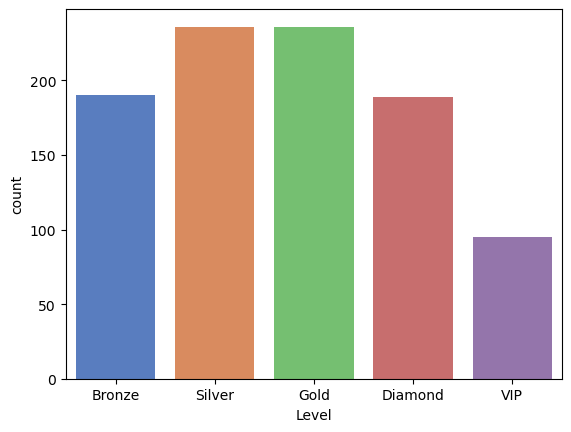

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x='Level', data=find_df, palette='muted', order=order_columns)

In [41]:
product_counts = find_df.groupby('Level')[['ProductA', 'ProductB', 'ProductC', 'ProductD']].sum()

# 등급 순서에 맞게 재정렬
product_counts = product_counts.reindex(['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
product_counts

,ProductA,ProductB,ProductC,ProductD
Level,,,,
Bronze,13502.32,20074.39,21937.18,15295.22
Silver,20394.33,26662.53,20889.09,25493.38
Gold,40651.58,32733.07,41827.29,40766.15
Diamond,23109.95,20808.16,32156.33,21985.18
VIP,19761.75,22759.93,27681.60,25188.38


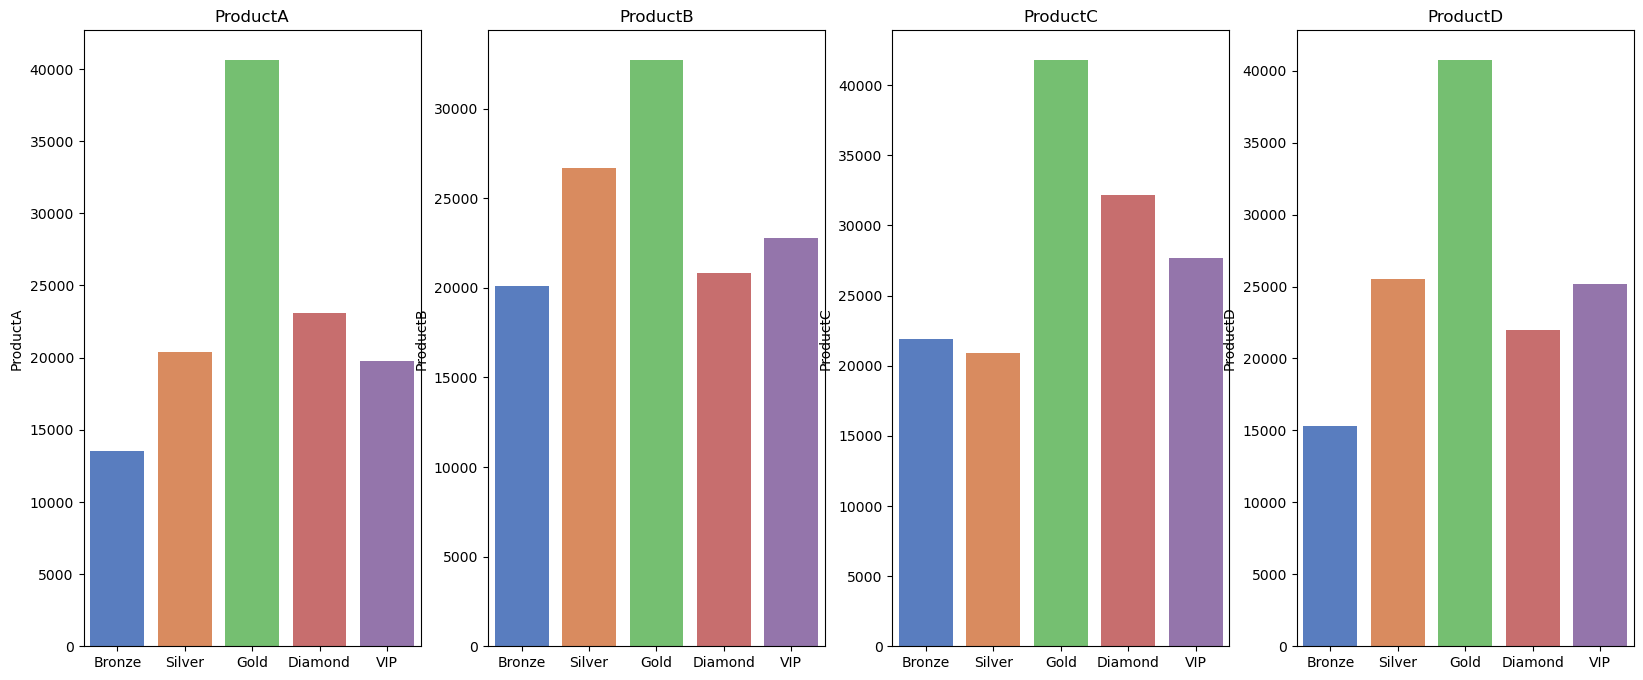

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 프레임 생성
data = {
    'ProductA': [13502.32, 20394.33, 40651.58, 23109.95, 19761.75],
    'ProductB': [20074.39, 26662.53, 32733.07, 20808.16, 22759.93],
    'ProductC': [21937.18, 20889.09, 41827.29, 32156.33, 27681.60],
    'ProductD': [15295.22, 25493.38, 40766.15, 21985.18, 25188.38]
}
index = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
df = pd.DataFrame(data, index=index)

# 플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.barplot(ax=axes[0], x=df.index, y='ProductA', data=df, palette='muted', order=order_columns)
sns.barplot(ax=axes[1], x=df.index, y='ProductB', data=df, palette='muted', order=order_columns)
sns.barplot(ax=axes[2], x=df.index, y='ProductC', data=df, palette='muted', order=order_columns)
sns.barplot(ax=axes[3], x=df.index, y='ProductD', data=df, palette='muted', order=order_columns)

# 각 subplot에 대한 레이블 설정
axes[0].set_title('ProductA')
axes[1].set_title('ProductB')
axes[2].set_title('ProductC')
axes[3].set_title('ProductD')

plt.show()


### 마케팅 전략 제안
> B제품은 낮은 등급 구매자가 많으며 대량구매 비율이 낮고 소량구매의 비율이 높은 구조를띄고있다.
> 배송비 보조등의 방법으로 지속적으로도 자사의 제품을 이용할 수 있도록 유도해야 하며
> C제품은 높은 등급의 구매자가 많으며 대량구매의 비율이 높고 소량구매의 비율이 높은 구조이다
> 일정 구매를 한다면 할인을 해주는등 고객의 이탈을 막아야한다.
> A의 경우 평균적으로 구매하는 수치가 높아 C제품을 이용하는 고객들에게 홍보하여 상위등급의 고객에게 A제품을 지속적으로 노출해야한다. 있다.